In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [2]:
#Helper function

#split the target in separat numpy arrays
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

#normalize the samples
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

#plotting the difference between the true output and the predicted output
def plot_diff(y_true, y_pred, title = ''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

#plotting the metrics
def plot_metrics(metric_name, title, ylim = 5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color = 'blue', label = metric_name)
    plt.plot(history.history['val_' + metric_name], color = 'green', label = 'val_' + metric_name)
    plt.show()
    

In [3]:
#reading the data from the source 
df = pd.read_excel('ENB2012_data.xlsx')
df = df.sample(frac = 1).reset_index(drop = True)

#preprocessing: split into training and testing sets
train, test = train_test_split(df, test_size = 0.2)
train_stats = train.describe()

#preprocessing: split the targets in a separat arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

#preprocessing: normalizing the data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [4]:
#Defining the model
input_layer = Input(shape = (len(train.columns),))
first_layer = Dense(128, activation = 'relu')(input_layer)
second_layer = Dense(units = 128, activation = 'relu')(first_layer)
Y1_output = Dense(1, name = 'Y1_output')(second_layer)
third_layer = Dense(64, activation = 'relu')(second_layer)
Y2_output = Dense(1, name = 'Y2_output')(third_layer)
model = Model(inputs = input_layer, outputs = [Y1_output, Y2_output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

In [5]:
#building the model
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = {'Y1_output':'mse', 'Y2_output':'mse'},
              metrics = {'Y1_output':tf.keras.metrics.RootMeanSquaredError(), 
                         'Y2_output':tf.keras.metrics.RootMeanSquaredError()})


In [6]:
#training the model for 500 epochs
history = model.fit(norm_train_X, train_Y, epochs = 500, batch_size = 10, validation_data = (norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 3s 8ms/step - loss: 243.6352 - Y1_output_loss: 116.9218 - Y2_output_loss: 126.7134 - Y1_output_root_mean_squared_error: 10.8130 - Y2_output_root_mean_squared_error: 11.2567 - val_loss: 24.8058 - val_Y1_output_loss: 10.4960 - val_Y2_output_loss: 14.3098 - val_Y1_output_root_mean_squared_error: 3.2397 - val_Y2_output_root_mean_squared_error: 3.7828
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 30.4844 - Y1_output_loss: 12.3239 - Y2_output_loss: 18.1605 - Y1_output_root_mean_squared_error: 3.5105 - Y2_output_root_mean_squared_error: 4.2615 - val_loss: 20.1927 - val_Y1_output_loss: 9.1238 - val_Y2_output_loss: 11.0689 - val_Y1_output_root_mean_squared_error: 3.0206 - val_Y2_output_root_mean_squared_error: 3.3270
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 28.6339 - Y1_output_loss: 10.6302 - Y2_output_loss: 18.0037 - Y1_output_root_mean_squared_error: 3.2604 - Y2_output_root_mean_squ

Epoch 22/500
62/62 [==============================] - 0s 2ms/step - loss: 11.4125 - Y1_output_loss: 4.4015 - Y2_output_loss: 7.0110 - Y1_output_root_mean_squared_error: 2.0980 - Y2_output_root_mean_squared_error: 2.6478 - val_loss: 21.7213 - val_Y1_output_loss: 6.5293 - val_Y2_output_loss: 15.1920 - val_Y1_output_root_mean_squared_error: 2.5553 - val_Y2_output_root_mean_squared_error: 3.8977
Epoch 23/500
62/62 [==============================] - 0s 2ms/step - loss: 12.9841 - Y1_output_loss: 4.4324 - Y2_output_loss: 8.5518 - Y1_output_root_mean_squared_error: 2.1053 - Y2_output_root_mean_squared_error: 2.9243 - val_loss: 14.2601 - val_Y1_output_loss: 4.2154 - val_Y2_output_loss: 10.0447 - val_Y1_output_root_mean_squared_error: 2.0532 - val_Y2_output_root_mean_squared_error: 3.1693
Epoch 24/500
62/62 [==============================] - 0s 3ms/step - loss: 11.1014 - Y1_output_loss: 4.0386 - Y2_output_loss: 7.0628 - Y1_output_root_mean_squared_error: 2.0096 - Y2_output_root_mean_squared_erro

Epoch 43/500
62/62 [==============================] - 0s 2ms/step - loss: 6.9912 - Y1_output_loss: 2.3550 - Y2_output_loss: 4.6362 - Y1_output_root_mean_squared_error: 1.5346 - Y2_output_root_mean_squared_error: 2.1532 - val_loss: 7.3466 - val_Y1_output_loss: 2.5879 - val_Y2_output_loss: 4.7587 - val_Y1_output_root_mean_squared_error: 1.6087 - val_Y2_output_root_mean_squared_error: 2.1815
Epoch 44/500
62/62 [==============================] - 0s 2ms/step - loss: 7.5949 - Y1_output_loss: 2.2838 - Y2_output_loss: 5.3110 - Y1_output_root_mean_squared_error: 1.5112 - Y2_output_root_mean_squared_error: 2.3046 - val_loss: 7.4157 - val_Y1_output_loss: 2.7162 - val_Y2_output_loss: 4.6995 - val_Y1_output_root_mean_squared_error: 1.6481 - val_Y2_output_root_mean_squared_error: 2.1678
Epoch 45/500
62/62 [==============================] - 0s 2ms/step - loss: 12.2525 - Y1_output_loss: 4.4172 - Y2_output_loss: 7.8353 - Y1_output_root_mean_squared_error: 2.1017 - Y2_output_root_mean_squared_error: 2.7

Epoch 64/500
62/62 [==============================] - 0s 2ms/step - loss: 5.8432 - Y1_output_loss: 1.7375 - Y2_output_loss: 4.1057 - Y1_output_root_mean_squared_error: 1.3181 - Y2_output_root_mean_squared_error: 2.0263 - val_loss: 4.7937 - val_Y1_output_loss: 1.4874 - val_Y2_output_loss: 3.3062 - val_Y1_output_root_mean_squared_error: 1.2196 - val_Y2_output_root_mean_squared_error: 1.8183
Epoch 65/500
62/62 [==============================] - 0s 2ms/step - loss: 4.8542 - Y1_output_loss: 1.4457 - Y2_output_loss: 3.4085 - Y1_output_root_mean_squared_error: 1.2024 - Y2_output_root_mean_squared_error: 1.8462 - val_loss: 6.2593 - val_Y1_output_loss: 1.5694 - val_Y2_output_loss: 4.6899 - val_Y1_output_root_mean_squared_error: 1.2528 - val_Y2_output_root_mean_squared_error: 2.1656
Epoch 66/500
62/62 [==============================] - 0s 2ms/step - loss: 5.0966 - Y1_output_loss: 1.5023 - Y2_output_loss: 3.5944 - Y1_output_root_mean_squared_error: 1.2257 - Y2_output_root_mean_squared_error: 1.89

Epoch 85/500
62/62 [==============================] - 0s 2ms/step - loss: 3.2262 - Y1_output_loss: 0.7408 - Y2_output_loss: 2.4854 - Y1_output_root_mean_squared_error: 0.8607 - Y2_output_root_mean_squared_error: 1.5765 - val_loss: 11.5074 - val_Y1_output_loss: 2.8412 - val_Y2_output_loss: 8.6662 - val_Y1_output_root_mean_squared_error: 1.6856 - val_Y2_output_root_mean_squared_error: 2.9438
Epoch 86/500
62/62 [==============================] - 0s 2ms/step - loss: 3.5134 - Y1_output_loss: 0.8326 - Y2_output_loss: 2.6808 - Y1_output_root_mean_squared_error: 0.9124 - Y2_output_root_mean_squared_error: 1.6373 - val_loss: 2.9736 - val_Y1_output_loss: 0.7737 - val_Y2_output_loss: 2.1999 - val_Y1_output_root_mean_squared_error: 0.8796 - val_Y2_output_root_mean_squared_error: 1.4832
Epoch 87/500
62/62 [==============================] - 0s 3ms/step - loss: 4.7119 - Y1_output_loss: 1.2132 - Y2_output_loss: 3.4986 - Y1_output_root_mean_squared_error: 1.1015 - Y2_output_root_mean_squared_error: 1.8

Epoch 106/500
62/62 [==============================] - 0s 2ms/step - loss: 2.5086 - Y1_output_loss: 0.5578 - Y2_output_loss: 1.9508 - Y1_output_root_mean_squared_error: 0.7469 - Y2_output_root_mean_squared_error: 1.3967 - val_loss: 2.0907 - val_Y1_output_loss: 0.4373 - val_Y2_output_loss: 1.6534 - val_Y1_output_root_mean_squared_error: 0.6612 - val_Y2_output_root_mean_squared_error: 1.2859
Epoch 107/500
62/62 [==============================] - 0s 2ms/step - loss: 2.7506 - Y1_output_loss: 0.5751 - Y2_output_loss: 2.1755 - Y1_output_root_mean_squared_error: 0.7584 - Y2_output_root_mean_squared_error: 1.4750 - val_loss: 2.1029 - val_Y1_output_loss: 0.4471 - val_Y2_output_loss: 1.6559 - val_Y1_output_root_mean_squared_error: 0.6686 - val_Y2_output_root_mean_squared_error: 1.2868
Epoch 108/500
62/62 [==============================] - 0s 2ms/step - loss: 3.0058 - Y1_output_loss: 0.7266 - Y2_output_loss: 2.2792 - Y1_output_root_mean_squared_error: 0.8524 - Y2_output_root_mean_squared_error: 1

Epoch 127/500
62/62 [==============================] - 0s 2ms/step - loss: 2.0574 - Y1_output_loss: 0.4870 - Y2_output_loss: 1.5703 - Y1_output_root_mean_squared_error: 0.6979 - Y2_output_root_mean_squared_error: 1.2531 - val_loss: 2.4758 - val_Y1_output_loss: 0.4622 - val_Y2_output_loss: 2.0135 - val_Y1_output_root_mean_squared_error: 0.6799 - val_Y2_output_root_mean_squared_error: 1.4190
Epoch 128/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6137 - Y1_output_loss: 0.3465 - Y2_output_loss: 1.2671 - Y1_output_root_mean_squared_error: 0.5887 - Y2_output_root_mean_squared_error: 1.1257 - val_loss: 1.9200 - val_Y1_output_loss: 0.4375 - val_Y2_output_loss: 1.4825 - val_Y1_output_root_mean_squared_error: 0.6615 - val_Y2_output_root_mean_squared_error: 1.2176
Epoch 129/500
62/62 [==============================] - 0s 2ms/step - loss: 2.3399 - Y1_output_loss: 0.6367 - Y2_output_loss: 1.7032 - Y1_output_root_mean_squared_error: 0.7979 - Y2_output_root_mean_squared_error: 1

Epoch 148/500
62/62 [==============================] - 0s 2ms/step - loss: 1.4881 - Y1_output_loss: 0.2923 - Y2_output_loss: 1.1958 - Y1_output_root_mean_squared_error: 0.5407 - Y2_output_root_mean_squared_error: 1.0935 - val_loss: 1.4812 - val_Y1_output_loss: 0.3084 - val_Y2_output_loss: 1.1727 - val_Y1_output_root_mean_squared_error: 0.5554 - val_Y2_output_root_mean_squared_error: 1.0829
Epoch 149/500
62/62 [==============================] - 0s 2ms/step - loss: 1.4779 - Y1_output_loss: 0.3115 - Y2_output_loss: 1.1664 - Y1_output_root_mean_squared_error: 0.5582 - Y2_output_root_mean_squared_error: 1.0800 - val_loss: 2.5979 - val_Y1_output_loss: 0.8487 - val_Y2_output_loss: 1.7491 - val_Y1_output_root_mean_squared_error: 0.9213 - val_Y2_output_root_mean_squared_error: 1.3225
Epoch 150/500
62/62 [==============================] - 0s 2ms/step - loss: 4.4462 - Y1_output_loss: 1.0903 - Y2_output_loss: 3.3558 - Y1_output_root_mean_squared_error: 1.0442 - Y2_output_root_mean_squared_error: 1

Epoch 169/500
62/62 [==============================] - 0s 2ms/step - loss: 1.3208 - Y1_output_loss: 0.2615 - Y2_output_loss: 1.0593 - Y1_output_root_mean_squared_error: 0.5113 - Y2_output_root_mean_squared_error: 1.0292 - val_loss: 9.5820 - val_Y1_output_loss: 1.2281 - val_Y2_output_loss: 8.3539 - val_Y1_output_root_mean_squared_error: 1.1082 - val_Y2_output_root_mean_squared_error: 2.8903
Epoch 170/500
62/62 [==============================] - 0s 2ms/step - loss: 1.7840 - Y1_output_loss: 0.3646 - Y2_output_loss: 1.4194 - Y1_output_root_mean_squared_error: 0.6038 - Y2_output_root_mean_squared_error: 1.1914 - val_loss: 2.0015 - val_Y1_output_loss: 0.6486 - val_Y2_output_loss: 1.3528 - val_Y1_output_root_mean_squared_error: 0.8054 - val_Y2_output_root_mean_squared_error: 1.1631
Epoch 171/500
62/62 [==============================] - 0s 2ms/step - loss: 1.6700 - Y1_output_loss: 0.3513 - Y2_output_loss: 1.3187 - Y1_output_root_mean_squared_error: 0.5927 - Y2_output_root_mean_squared_error: 1

Epoch 190/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0541 - Y1_output_loss: 0.2238 - Y2_output_loss: 0.8303 - Y1_output_root_mean_squared_error: 0.4731 - Y2_output_root_mean_squared_error: 0.9112 - val_loss: 1.3314 - val_Y1_output_loss: 0.2885 - val_Y2_output_loss: 1.0430 - val_Y1_output_root_mean_squared_error: 0.5371 - val_Y2_output_root_mean_squared_error: 1.0213
Epoch 191/500
62/62 [==============================] - 0s 2ms/step - loss: 1.4551 - Y1_output_loss: 0.2988 - Y2_output_loss: 1.1563 - Y1_output_root_mean_squared_error: 0.5466 - Y2_output_root_mean_squared_error: 1.0753 - val_loss: 1.1614 - val_Y1_output_loss: 0.2674 - val_Y2_output_loss: 0.8940 - val_Y1_output_root_mean_squared_error: 0.5171 - val_Y2_output_root_mean_squared_error: 0.9455
Epoch 192/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0443 - Y1_output_loss: 0.2148 - Y2_output_loss: 0.8294 - Y1_output_root_mean_squared_error: 0.4635 - Y2_output_root_mean_squared_error: 0

Epoch 211/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9597 - Y1_output_loss: 0.1946 - Y2_output_loss: 0.7651 - Y1_output_root_mean_squared_error: 0.4411 - Y2_output_root_mean_squared_error: 0.8747 - val_loss: 1.5304 - val_Y1_output_loss: 0.4913 - val_Y2_output_loss: 1.0391 - val_Y1_output_root_mean_squared_error: 0.7009 - val_Y2_output_root_mean_squared_error: 1.0193
Epoch 212/500
62/62 [==============================] - 0s 2ms/step - loss: 1.1700 - Y1_output_loss: 0.2533 - Y2_output_loss: 0.9166 - Y1_output_root_mean_squared_error: 0.5033 - Y2_output_root_mean_squared_error: 0.9574 - val_loss: 1.4828 - val_Y1_output_loss: 0.2224 - val_Y2_output_loss: 1.2604 - val_Y1_output_root_mean_squared_error: 0.4716 - val_Y2_output_root_mean_squared_error: 1.1227
Epoch 213/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0490 - Y1_output_loss: 0.2251 - Y2_output_loss: 0.8240 - Y1_output_root_mean_squared_error: 0.4744 - Y2_output_root_mean_squared_error: 0

Epoch 232/500
62/62 [==============================] - 0s 2ms/step - loss: 0.8432 - Y1_output_loss: 0.1716 - Y2_output_loss: 0.6716 - Y1_output_root_mean_squared_error: 0.4142 - Y2_output_root_mean_squared_error: 0.8195 - val_loss: 1.1862 - val_Y1_output_loss: 0.2543 - val_Y2_output_loss: 0.9319 - val_Y1_output_root_mean_squared_error: 0.5042 - val_Y2_output_root_mean_squared_error: 0.9654
Epoch 233/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0459 - Y1_output_loss: 0.1989 - Y2_output_loss: 0.8470 - Y1_output_root_mean_squared_error: 0.4460 - Y2_output_root_mean_squared_error: 0.9203 - val_loss: 1.7441 - val_Y1_output_loss: 0.6762 - val_Y2_output_loss: 1.0679 - val_Y1_output_root_mean_squared_error: 0.8223 - val_Y2_output_root_mean_squared_error: 1.0334
Epoch 234/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0693 - Y1_output_loss: 0.2310 - Y2_output_loss: 0.8382 - Y1_output_root_mean_squared_error: 0.4807 - Y2_output_root_mean_squared_error: 0

Epoch 253/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9858 - Y1_output_loss: 0.2183 - Y2_output_loss: 0.7675 - Y1_output_root_mean_squared_error: 0.4672 - Y2_output_root_mean_squared_error: 0.8761 - val_loss: 1.0117 - val_Y1_output_loss: 0.2604 - val_Y2_output_loss: 0.7513 - val_Y1_output_root_mean_squared_error: 0.5103 - val_Y2_output_root_mean_squared_error: 0.8668
Epoch 254/500
62/62 [==============================] - 0s 2ms/step - loss: 1.1635 - Y1_output_loss: 0.2945 - Y2_output_loss: 0.8690 - Y1_output_root_mean_squared_error: 0.5427 - Y2_output_root_mean_squared_error: 0.9322 - val_loss: 0.9766 - val_Y1_output_loss: 0.1967 - val_Y2_output_loss: 0.7799 - val_Y1_output_root_mean_squared_error: 0.4435 - val_Y2_output_root_mean_squared_error: 0.8831
Epoch 255/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7334 - Y1_output_loss: 0.1801 - Y2_output_loss: 0.5533 - Y1_output_root_mean_squared_error: 0.4244 - Y2_output_root_mean_squared_error: 0

Epoch 274/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6635 - Y1_output_loss: 0.1626 - Y2_output_loss: 0.5009 - Y1_output_root_mean_squared_error: 0.4032 - Y2_output_root_mean_squared_error: 0.7078 - val_loss: 1.0383 - val_Y1_output_loss: 0.2020 - val_Y2_output_loss: 0.8363 - val_Y1_output_root_mean_squared_error: 0.4494 - val_Y2_output_root_mean_squared_error: 0.9145
Epoch 275/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9770 - Y1_output_loss: 0.2087 - Y2_output_loss: 0.7683 - Y1_output_root_mean_squared_error: 0.4568 - Y2_output_root_mean_squared_error: 0.8765 - val_loss: 1.7646 - val_Y1_output_loss: 0.4338 - val_Y2_output_loss: 1.3308 - val_Y1_output_root_mean_squared_error: 0.6586 - val_Y2_output_root_mean_squared_error: 1.1536
Epoch 276/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9790 - Y1_output_loss: 0.2064 - Y2_output_loss: 0.7726 - Y1_output_root_mean_squared_error: 0.4543 - Y2_output_root_mean_squared_error: 0

62/62 [==============================] - 0s 2ms/step - loss: 0.6558 - Y1_output_loss: 0.1463 - Y2_output_loss: 0.5095 - Y1_output_root_mean_squared_error: 0.3825 - Y2_output_root_mean_squared_error: 0.7138 - val_loss: 1.4169 - val_Y1_output_loss: 0.2086 - val_Y2_output_loss: 1.2082 - val_Y1_output_root_mean_squared_error: 0.4568 - val_Y2_output_root_mean_squared_error: 1.0992
Epoch 295/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9154 - Y1_output_loss: 0.1683 - Y2_output_loss: 0.7471 - Y1_output_root_mean_squared_error: 0.4102 - Y2_output_root_mean_squared_error: 0.8644 - val_loss: 1.0132 - val_Y1_output_loss: 0.2287 - val_Y2_output_loss: 0.7844 - val_Y1_output_root_mean_squared_error: 0.4782 - val_Y2_output_root_mean_squared_error: 0.8857
Epoch 296/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6222 - Y1_output_loss: 0.1566 - Y2_output_loss: 0.4656 - Y1_output_root_mean_squared_error: 0.3958 - Y2_output_root_mean_squared_error: 0.6823 - val_lo

Epoch 315/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7949 - Y1_output_loss: 0.1787 - Y2_output_loss: 0.6162 - Y1_output_root_mean_squared_error: 0.4228 - Y2_output_root_mean_squared_error: 0.7850 - val_loss: 1.0430 - val_Y1_output_loss: 0.2317 - val_Y2_output_loss: 0.8114 - val_Y1_output_root_mean_squared_error: 0.4813 - val_Y2_output_root_mean_squared_error: 0.9008
Epoch 316/500
62/62 [==============================] - 0s 2ms/step - loss: 0.8797 - Y1_output_loss: 0.1958 - Y2_output_loss: 0.6839 - Y1_output_root_mean_squared_error: 0.4425 - Y2_output_root_mean_squared_error: 0.8270 - val_loss: 1.0050 - val_Y1_output_loss: 0.2267 - val_Y2_output_loss: 0.7784 - val_Y1_output_root_mean_squared_error: 0.4761 - val_Y2_output_root_mean_squared_error: 0.8822
Epoch 317/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6411 - Y1_output_loss: 0.1587 - Y2_output_loss: 0.4824 - Y1_output_root_mean_squared_error: 0.3984 - Y2_output_root_mean_squared_error: 0

Epoch 336/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5244 - Y1_output_loss: 0.1438 - Y2_output_loss: 0.3806 - Y1_output_root_mean_squared_error: 0.3792 - Y2_output_root_mean_squared_error: 0.6170 - val_loss: 0.8250 - val_Y1_output_loss: 0.1891 - val_Y2_output_loss: 0.6359 - val_Y1_output_root_mean_squared_error: 0.4348 - val_Y2_output_root_mean_squared_error: 0.7974
Epoch 337/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5358 - Y1_output_loss: 0.1361 - Y2_output_loss: 0.3997 - Y1_output_root_mean_squared_error: 0.3689 - Y2_output_root_mean_squared_error: 0.6323 - val_loss: 1.1928 - val_Y1_output_loss: 0.3376 - val_Y2_output_loss: 0.8552 - val_Y1_output_root_mean_squared_error: 0.5810 - val_Y2_output_root_mean_squared_error: 0.9248
Epoch 338/500
62/62 [==============================] - 0s 2ms/step - loss: 1.1324 - Y1_output_loss: 0.2581 - Y2_output_loss: 0.8743 - Y1_output_root_mean_squared_error: 0.5080 - Y2_output_root_mean_squared_error: 0

Epoch 357/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7278 - Y1_output_loss: 0.1611 - Y2_output_loss: 0.5667 - Y1_output_root_mean_squared_error: 0.4014 - Y2_output_root_mean_squared_error: 0.7528 - val_loss: 0.8953 - val_Y1_output_loss: 0.2356 - val_Y2_output_loss: 0.6597 - val_Y1_output_root_mean_squared_error: 0.4854 - val_Y2_output_root_mean_squared_error: 0.8122
Epoch 358/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5192 - Y1_output_loss: 0.1377 - Y2_output_loss: 0.3815 - Y1_output_root_mean_squared_error: 0.3710 - Y2_output_root_mean_squared_error: 0.6177 - val_loss: 1.8308 - val_Y1_output_loss: 0.3538 - val_Y2_output_loss: 1.4770 - val_Y1_output_root_mean_squared_error: 0.5948 - val_Y2_output_root_mean_squared_error: 1.2153
Epoch 359/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7445 - Y1_output_loss: 0.1761 - Y2_output_loss: 0.5684 - Y1_output_root_mean_squared_error: 0.4196 - Y2_output_root_mean_squared_error: 0

Epoch 378/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6826 - Y1_output_loss: 0.1601 - Y2_output_loss: 0.5225 - Y1_output_root_mean_squared_error: 0.4001 - Y2_output_root_mean_squared_error: 0.7228 - val_loss: 0.9559 - val_Y1_output_loss: 0.2153 - val_Y2_output_loss: 0.7406 - val_Y1_output_root_mean_squared_error: 0.4640 - val_Y2_output_root_mean_squared_error: 0.8606
Epoch 379/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4601 - Y1_output_loss: 0.1390 - Y2_output_loss: 0.3211 - Y1_output_root_mean_squared_error: 0.3729 - Y2_output_root_mean_squared_error: 0.5667 - val_loss: 0.8547 - val_Y1_output_loss: 0.2171 - val_Y2_output_loss: 0.6376 - val_Y1_output_root_mean_squared_error: 0.4659 - val_Y2_output_root_mean_squared_error: 0.7985
Epoch 380/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4513 - Y1_output_loss: 0.1331 - Y2_output_loss: 0.3182 - Y1_output_root_mean_squared_error: 0.3648 - Y2_output_root_mean_squared_error: 0

Epoch 399/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5434 - Y1_output_loss: 0.1404 - Y2_output_loss: 0.4030 - Y1_output_root_mean_squared_error: 0.3747 - Y2_output_root_mean_squared_error: 0.6348 - val_loss: 0.8337 - val_Y1_output_loss: 0.2057 - val_Y2_output_loss: 0.6279 - val_Y1_output_root_mean_squared_error: 0.4536 - val_Y2_output_root_mean_squared_error: 0.7924
Epoch 400/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5093 - Y1_output_loss: 0.1377 - Y2_output_loss: 0.3716 - Y1_output_root_mean_squared_error: 0.3711 - Y2_output_root_mean_squared_error: 0.6096 - val_loss: 4.9214 - val_Y1_output_loss: 0.4903 - val_Y2_output_loss: 4.4311 - val_Y1_output_root_mean_squared_error: 0.7002 - val_Y2_output_root_mean_squared_error: 2.1050
Epoch 401/500
62/62 [==============================] - 0s 2ms/step - loss: 0.8099 - Y1_output_loss: 0.2024 - Y2_output_loss: 0.6074 - Y1_output_root_mean_squared_error: 0.4499 - Y2_output_root_mean_squared_error: 0

Epoch 420/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4552 - Y1_output_loss: 0.1259 - Y2_output_loss: 0.3292 - Y1_output_root_mean_squared_error: 0.3549 - Y2_output_root_mean_squared_error: 0.5738 - val_loss: 0.8658 - val_Y1_output_loss: 0.1982 - val_Y2_output_loss: 0.6677 - val_Y1_output_root_mean_squared_error: 0.4452 - val_Y2_output_root_mean_squared_error: 0.8171
Epoch 421/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6098 - Y1_output_loss: 0.1413 - Y2_output_loss: 0.4686 - Y1_output_root_mean_squared_error: 0.3759 - Y2_output_root_mean_squared_error: 0.6845 - val_loss: 0.7535 - val_Y1_output_loss: 0.1687 - val_Y2_output_loss: 0.5847 - val_Y1_output_root_mean_squared_error: 0.4108 - val_Y2_output_root_mean_squared_error: 0.7647
Epoch 422/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4643 - Y1_output_loss: 0.1254 - Y2_output_loss: 0.3389 - Y1_output_root_mean_squared_error: 0.3541 - Y2_output_root_mean_squared_error: 0

Epoch 441/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3779 - Y1_output_loss: 0.1209 - Y2_output_loss: 0.2570 - Y1_output_root_mean_squared_error: 0.3477 - Y2_output_root_mean_squared_error: 0.5070 - val_loss: 0.9643 - val_Y1_output_loss: 0.2261 - val_Y2_output_loss: 0.7382 - val_Y1_output_root_mean_squared_error: 0.4755 - val_Y2_output_root_mean_squared_error: 0.8592
Epoch 442/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6091 - Y1_output_loss: 0.1848 - Y2_output_loss: 0.4243 - Y1_output_root_mean_squared_error: 0.4299 - Y2_output_root_mean_squared_error: 0.6514 - val_loss: 0.9007 - val_Y1_output_loss: 0.1973 - val_Y2_output_loss: 0.7034 - val_Y1_output_root_mean_squared_error: 0.4442 - val_Y2_output_root_mean_squared_error: 0.8387
Epoch 443/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5239 - Y1_output_loss: 0.1280 - Y2_output_loss: 0.3959 - Y1_output_root_mean_squared_error: 0.3578 - Y2_output_root_mean_squared_error: 0

Epoch 462/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3658 - Y1_output_loss: 0.1185 - Y2_output_loss: 0.2473 - Y1_output_root_mean_squared_error: 0.3442 - Y2_output_root_mean_squared_error: 0.4973 - val_loss: 0.9608 - val_Y1_output_loss: 0.2229 - val_Y2_output_loss: 0.7379 - val_Y1_output_root_mean_squared_error: 0.4721 - val_Y2_output_root_mean_squared_error: 0.8590
Epoch 463/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6240 - Y1_output_loss: 0.1566 - Y2_output_loss: 0.4674 - Y1_output_root_mean_squared_error: 0.3958 - Y2_output_root_mean_squared_error: 0.6837 - val_loss: 0.8733 - val_Y1_output_loss: 0.1846 - val_Y2_output_loss: 0.6887 - val_Y1_output_root_mean_squared_error: 0.4296 - val_Y2_output_root_mean_squared_error: 0.8299
Epoch 464/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4409 - Y1_output_loss: 0.1263 - Y2_output_loss: 0.3146 - Y1_output_root_mean_squared_error: 0.3554 - Y2_output_root_mean_squared_error: 0

Epoch 483/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5461 - Y1_output_loss: 0.1526 - Y2_output_loss: 0.3935 - Y1_output_root_mean_squared_error: 0.3907 - Y2_output_root_mean_squared_error: 0.6273 - val_loss: 1.0959 - val_Y1_output_loss: 0.3645 - val_Y2_output_loss: 0.7315 - val_Y1_output_root_mean_squared_error: 0.6037 - val_Y2_output_root_mean_squared_error: 0.8553
Epoch 484/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6524 - Y1_output_loss: 0.1651 - Y2_output_loss: 0.4873 - Y1_output_root_mean_squared_error: 0.4063 - Y2_output_root_mean_squared_error: 0.6980 - val_loss: 1.0893 - val_Y1_output_loss: 0.1889 - val_Y2_output_loss: 0.9004 - val_Y1_output_root_mean_squared_error: 0.4347 - val_Y2_output_root_mean_squared_error: 0.9489
Epoch 485/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3834 - Y1_output_loss: 0.1194 - Y2_output_loss: 0.2640 - Y1_output_root_mean_squared_error: 0.3455 - Y2_output_root_mean_squared_error: 0

In [7]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 0.7858 - Y1_output_loss: 0.1936 - Y2_output_loss: 0.5922 - Y1_output_root_mean_squared_error: 0.4400 - Y2_output_root_mean_squared_error: 0.7695
Loss = 0.7857885360717773, Y1_loss = 0.19360509514808655, Y1_mse = 0.4400057792663574, Y2_loss = 0.5921834707260132, Y2_mse = 0.7695345878601074


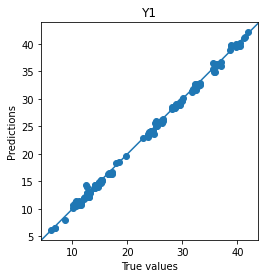

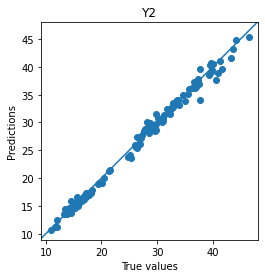

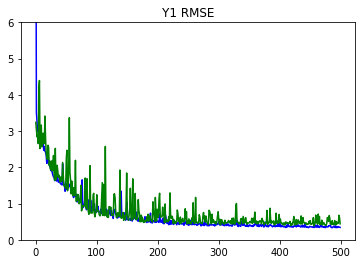

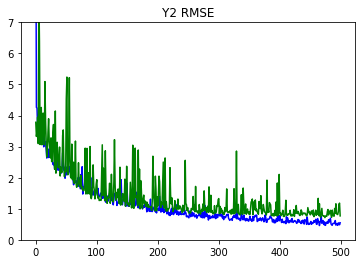

In [9]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='Y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='Y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)